# Lesson 3

## Supervised Learning- Regression Models


---

## Overview

Welcome to this Lesson. We are now going to use our new skills to build our supervised learning models that use a regression approach.

---


In [8]:
# Sample dataset with a positive linear relationship
import numpy as np
import matplotlib.pyplot as plt

# Input feature (X) and target variable (y)
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.5, 3.2, 4.7, 6.1, 8.0])


In [2]:
# Compute the beta coefficients by hand
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the numerator and denominator for beta_1
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

# Calculate beta_1 and beta_0
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * X_mean

print(f"Computed by hand - beta_0 (intercept): {beta_0}, beta_1 (slope): {beta_1}")


Computed by hand - beta_0 (intercept): -0.07000000000000028, beta_1 (slope): 1.59


In [3]:
# Compute the beta coefficients using scikit-learn
from sklearn.linear_model import LinearRegression

# Reshape X to fit the model
X_reshaped = X.reshape(-1, 1)

# Create and fit the model
model = LinearRegression().fit(X_reshaped, y)

# Extract the coefficients
beta_0_sklearn = model.intercept_
beta_1_sklearn = model.coef_[0]

print(f"Computed using scikit-learn - beta_0 (intercept): {beta_0_sklearn}, beta_1 (slope): {beta_1_sklearn}")


Computed using scikit-learn - beta_0 (intercept): -0.07000000000000028, beta_1 (slope): 1.59


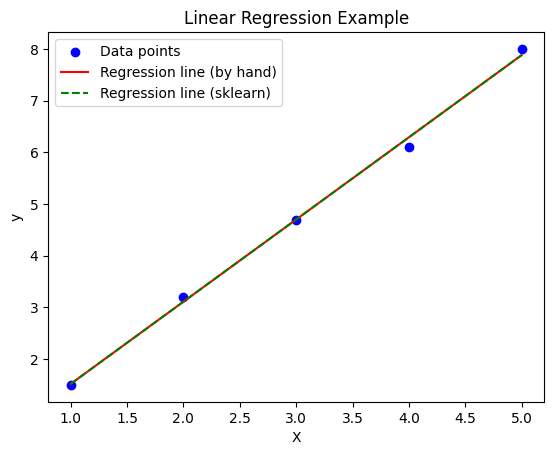

In [4]:
# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Regression line (by hand)')
plt.plot(X, beta_0_sklearn + beta_1_sklearn * X, color='green', linestyle='dashed', label='Regression line (sklearn)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()


### Creating our historical returns dataset

In [9]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [10]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [ ]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

In [11]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [12]:
# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  501 of 501 completed


Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.6130 NaN 0.8450  NaN  NaN 8.9928 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2815 NaN 0.7737  NaN  NaN 8.7359 1.2708 NaN 14.9094 26.8927   
2000-01-05   37.7828 NaN 0.7851  NaN  NaN 8.7199 1.3889 NaN 15.2042 27.2853   
2000-01-06   36.3442 NaN 0.7171  NaN  NaN 9.0250 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.3729 NaN 0.7511  NaN  NaN 9.1213 1.4514 NaN 16.0730 27.2853   

Price       ... Volume                                                    \
Ticker      ...    WTW       WY WYNN      XEL       XOM XYL      YUM ZBH   
Date        ...                                                            
2000-01-03  ...    NaN   973700  NaN  2738600  13458200 NaN  3033493 NaN   
2000-01-04  ...    NaN  1201700  NaN   425200  14510800 NaN  3315031 NaN   
2000-01-05  ...    NaN  1184600  NaN   500200  17485000 NaN  4642602 NaN   
2000-01-06  ...    NaN  1307700  NaN   344100  19461600 NaN  3947658 NaN   
2000-01-07  ...    NaN  1728000  NaN   469500  16603800 NaN  6063647 NaN   

Price                    
Ticker         ZBRA ZTS  
Date                     
2000-01-03  1055700 NaN  
2000-01-04   522450 NaN  
2000-01-05   612225 NaN  
2000-01-06   263925 NaN  
2000-01-07   333900 NaN  

[5 rows x 3006 columns]

In [13]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.6130 NaN 0.8450  NaN  NaN 8.9928 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2815 NaN 0.7737  NaN  NaN 8.7359 1.2708 NaN 14.9094 26.8927   
2000-01-05   37.7828 NaN 0.7851  NaN  NaN 8.7199 1.3889 NaN 15.2042 27.2853   
2000-01-06   36.3442 NaN 0.7171  NaN  NaN 9.0250 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.3729 NaN 0.7511  NaN  NaN 9.1213 1.4514 NaN 16.0730 27.2853   

Price       ...                                                             
Ticker      ... WTW      WY WYNN    XEL     XOM XYL    YUM ZBH    ZBRA ZTS  
Date        ...                                                             
2000-01-03  ... NaN 11.4279  NaN 6.9780 18.1810 NaN 4.6574 NaN 25.0278 NaN  
2000-01-04  ... NaN 10.9986  NaN 7.1387 17.8328 NaN 4.5638 NaN 24.6667 NaN  
2000-01-05  ... NaN 11.5812  NaN 7.4141 18.8050 NaN 4.5872 NaN 25.1389 NaN  
2000-01-06  ... NaN 12.1230  NaN 7.3453 19.7771 NaN 4.5482 NaN 23.7778 NaN  
2000-01-07  ... NaN 11.7243  NaN 7.3453 19.7191 NaN 4.4468 NaN 23.5139 NaN  

[5 rows x 501 columns]

In [14]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()

Ticker           A  AAL   AAPL  ABBV  ABNB    ABT   ACGL  ACN    ADBE     ADI  \
Date                                                                            
2000-01-03 43.6130  NaN 0.8450   NaN   NaN 8.9928 1.2778  NaN 16.2747 28.3256   
2000-01-04 40.2815  NaN 0.7737   NaN   NaN 8.7359 1.2708  NaN 14.9094 26.8927   
2000-01-05 37.7828  NaN 0.7851   NaN   NaN 8.7199 1.3889  NaN 15.2042 27.2853   
2000-01-06 36.3442  NaN 0.7171   NaN   NaN 9.0250 1.3750  NaN 15.3283 26.5393   
2000-01-07 39.3729  NaN 0.7511   NaN   NaN 9.1213 1.4514  NaN 16.0730 27.2853   

Ticker      ...  WTW      WY  WYNN    XEL     XOM  XYL    YUM  ZBH    ZBRA  \
Date        ...                                                              
2000-01-03  ...  NaN 11.4279   NaN 6.9780 18.1810  NaN 4.6574  NaN 25.0278   
2000-01-04  ...  NaN 10.9986   NaN 7.1387 17.8328  NaN 4.5638  NaN 24.6667   
2000-01-05  ...  NaN 11.5812   NaN 7.4141 18.8050  NaN 4.5872  NaN 25.1389   
2000-01-06  ...  NaN 12.1230   NaN 7.3453 19.7771  NaN 4.5482  NaN 23.7778   
2000-01-07  ...  NaN 11.7243   NaN 7.3453 19.7191  NaN 4.4468  NaN 23.5139   

Ticker      ZTS  
Date             
2000-01-03  NaN  
2000-01-04  NaN  
2000-01-05  NaN  
2000-01-06  NaN  
2000-01-07  NaN  

[5 rows x 501 columns]

In [15]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100
# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 501, dtype: int64

In [16]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=499)

In [17]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [18]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [ ]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 2, 3, 4, 5, 10, 15, 20, 30, 60]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

In [ ]:
total_returns = total_returns.filter(items=['F_1_d_returns', '1_d_returns'])
total_returns.head()

In [ ]:
total_returns.index.get_level_values('Ticker').nunique()

In [ ]:
total_returns.index.get_level_values('Date').value_counts().describe()

In [ ]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

In [ ]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
total_returns.describe()

In [ ]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean_bm  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns_bm = pd.DataFrame((daily_mean_bm[['SP&500']]+1).cumprod())
#cum_returns_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

In [ ]:
# Plotting the cumulative returns
cum_returns_bm.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [ ]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean_bm) / 252  # Assuming 252 trading days in a year

In [ ]:
ending_value    = cum_returns_bm['SP&500'].iloc[-1]
beginning_value = cum_returns_bm['SP&500'].iloc[1]

In [ ]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

In [ ]:
daily_mean_bm[['SP&500']].describe()

In [ ]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [ ]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

In [ ]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean_bm[['SP&500']]+1).groupby(daily_mean_bm.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns_bm  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean_bm.index.get_level_values(0).year).last())

In [ ]:
calendar_returns_bm.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

In [ ]:
# Create a function to calculate RSI using returns
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()    
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()    
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')    
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [ ]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [ ]:
total_returns[['RSI']].describe()

In [ ]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Turn off gridlines for histograms

# Displaying the plot
plt.show()

In [ ]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)

# Displaying the plot
#plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [ ]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

In [ ]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

## Beginning Lesson 3

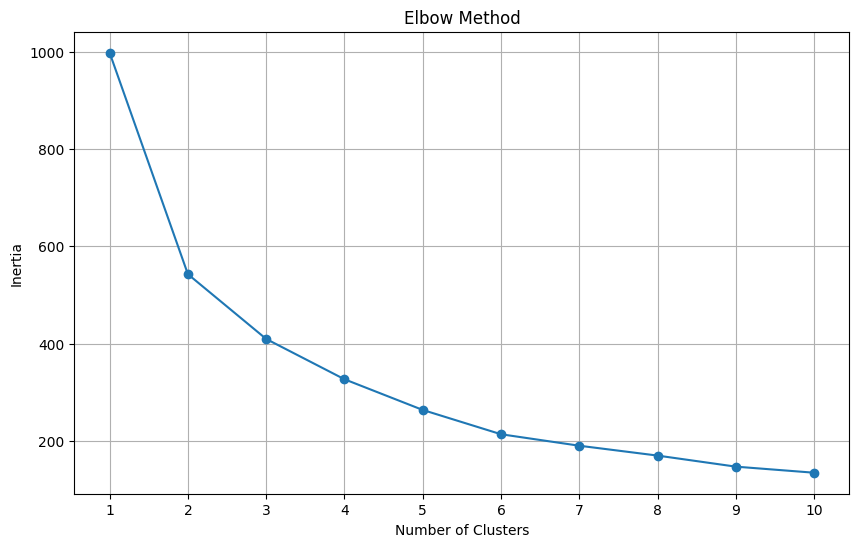

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Assuming you have a DataFrame 'df' with 'Date', 'Ticker', and 'F_1_d_returns' columns
# Group by Ticker and calculate average return and standard deviation
ticker_stats = total_returns.groupby('Ticker')['F_1_d_returns'].agg(['mean', 'std'])

# Standardize the data
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats[['mean', 'std']])


# Set the OMP_NUM_THREADS environment variable to avoid memory leak
#os.environ["OMP_NUM_THREADS"] = "2"

# Initialize list to store inertias
inertias = []

# Test different numbers of clusters
for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ticker_stats_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load S&P 500 returns data
total_returns = pd.read_csv('total_returns.csv')  # Assuming the data is stored in a CSV file


In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats)


In [22]:
from sklearn.cluster import KMeans

# Number of clusters (you can adjust this)
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(ticker_stats_scaled)

# Add cluster labels to the original DataFrame
ticker_stats['Cluster'] = clusters

# Count the number of stocks in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Inverse transform scaled mean and std to get the original data
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=['mean', 'std'])
cluster_centers_df['Stocks Count'] = cluster_counts.values

# Print the clusters
print("Cluster Centers with Stock Count:")
print(cluster_centers_df)

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
cluster_labels

array([3, 1, 2, ..., 1, 2, 4])

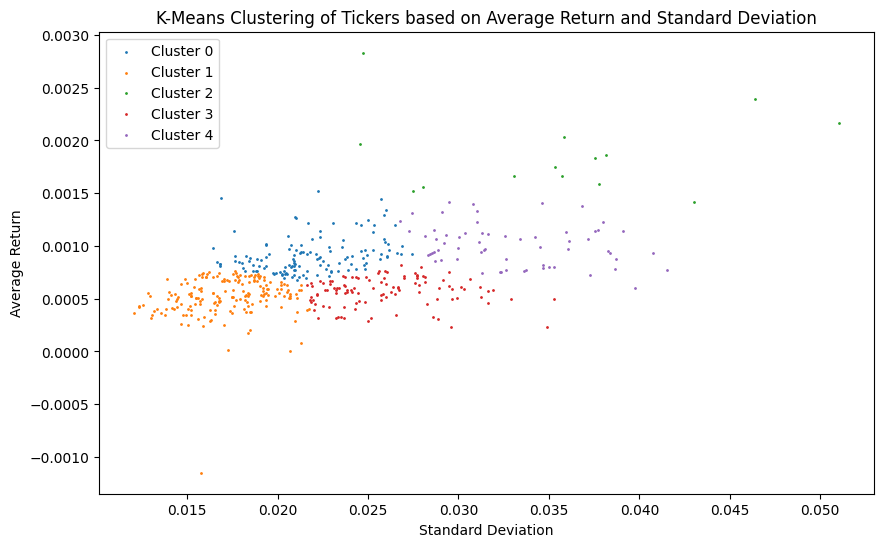

In [28]:
# Visualize the clusters
# (You may need to adjust this based on your visualization preferences)
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(ticker_stats[ticker_stats['Cluster'] == cluster]['std'],
                ticker_stats[ticker_stats['Cluster'] == cluster]['mean'],
                label=f'Cluster {cluster}', s=1)
plt.title('K-Means Clustering of Tickers based on Average Return and Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Examine stocks within each cluster
clustered_stocks = total_returns.groupby('Cluster')['F_1_d_returns'].unique()

# Evaluate the quality of clusters (e.g., silhouette score)
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_score}')

### PCA 

In [37]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1,2,3, 29,30,31, 59,60,61]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  \
Ticker Date                                                               
A      2000-03-30        -0.0095      -0.0625      -0.1186      -0.0810   
       2000-03-31        -0.0577      -0.0095      -0.0714      -0.1270   
       2000-04-03        -0.0459      -0.0577      -0.0667      -0.1250   
       2000-04-04         0.0368      -0.0459      -0.1010      -0.1095   
       2000-04-05         0.0832       0.0368      -0.0108      -0.0679   

                   29_d_returns  30_d_returns  31_d_returns  59_d_returns  \
Ticker Date                                                                 
A      2000-03-30        0.0825        0.2963        0.2824        0.6834   
       2000-03-31        0.1093        0.0722        0.2840        0.7333   
       2000-04-03        0.0710        0.0453        0.0103        0.5077   
       2000-04-04       -0.0556        0.0219       -0.0027        0.3563   
       2000-04-05       -0.0919       -0.0208        0.0594        0.4256   

                   60_d_returns  61_d_returns  
Ticker Date                                    
A      2000-03-30        0.5789        0.4583  
       2000-03-31        0.6673        0.5639  
       2000-04-03        0.6333        0.5711  
       2000-04-04        0.4385        0.5583  
       2000-04-05        0.4062        0.4913

In [38]:
from sklearn.preprocessing import StandardScaler

# Extracting features by dropping the target column
features = total_returns.drop(columns=('F_1_d_returns')).columns.to_list()
X = total_returns[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(X_scaled)

# Transform the data to principal components
X_pca = pca.transform(X_scaled)

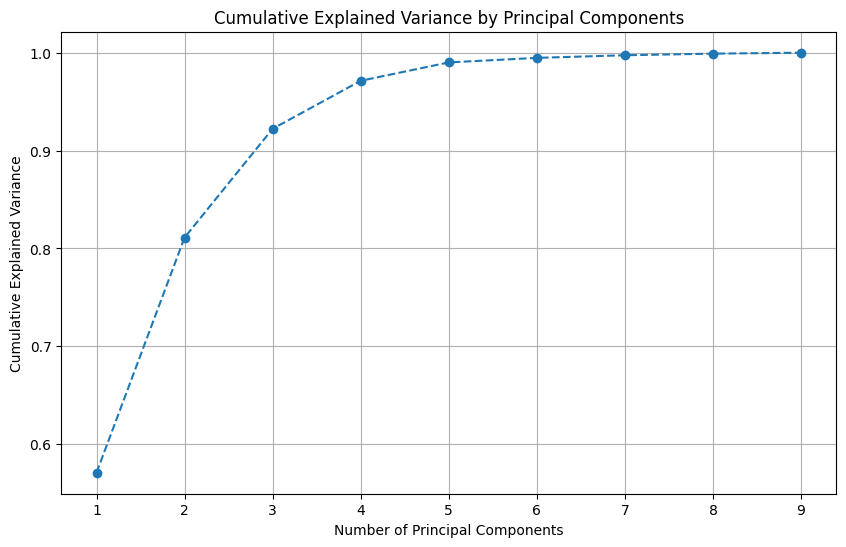

In [40]:
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [41]:
# Select number of components that explain 90% variance
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [42]:
# Get the loadings of the principal components
loadings = pca.components_

# Create a dataframe of the loadings
loadings_df = pd.DataFrame(loadings.T, index=features, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the loadings
print(loadings_df)

                PC1     PC2     PC3
1_d_returns  0.1336  0.5298 -0.1259
2_d_returns  0.1713  0.5795 -0.0877
3_d_returns  0.1887  0.5306 -0.0349
29_d_returns 0.3918 -0.0487  0.4268
30_d_returns 0.3959 -0.0561  0.4210
31_d_returns 0.3967 -0.0631  0.3980
59_d_returns 0.3887 -0.1748 -0.3796
60_d_returns 0.3877 -0.1761 -0.3936
61_d_returns 0.3850 -0.1756 -0.3980


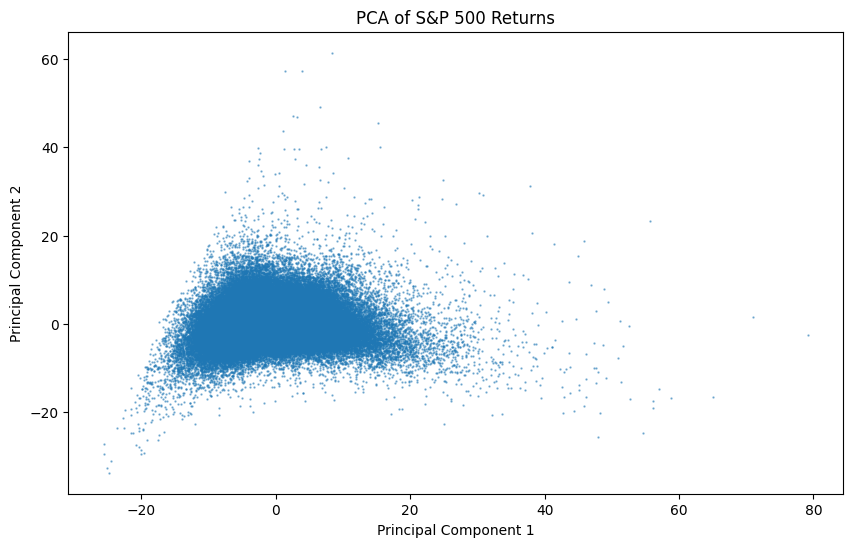

In [43]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S&P 500 Returns')
plt.show()


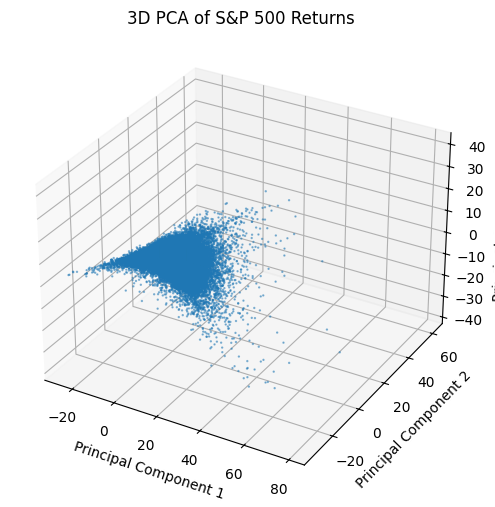

In [44]:
# 3D Scatter plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, s=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of S&P 500 Returns')

plt.show()

### Combining PCA and KMeans

In [22]:
# Example: Clustering on PCA-reduced data
from sklearn.cluster import KMeans

# Initialize K-means algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means to the PCA-reduced data
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
total_returns['Cluster'] = cluster_labels

# Analyze the characteristics of each cluster
cluster_stats = total_returns.groupby('Cluster').mean()

# Display cluster characteristics
print(cluster_stats)

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  4_d_returns  \
Cluster                                                                      
0               0.0009      -0.0129      -0.0230      -0.0300      -0.0343   
1               0.0003       0.0157       0.0282       0.0376       0.0438   
2               0.0045      -0.0506      -0.0832      -0.1046      -0.1174   
3               0.0006       0.0014       0.0024       0.0032       0.0041   
4              -0.0007       0.0580       0.1018       0.1306       0.1458   

         5_d_returns  6_d_returns  7_d_returns  8_d_returns  9_d_returns  \
Cluster                                                                    
0            -0.0358      -0.0346      -0.0336      -0.0327      -0.0319   
1             0.0467       0.0465       0.0463       0.0464       0.0465   
2            -0.1230      -0.1228      -0.1220      -0.1222      -0.1231   
3             0.0050       0.0060       0.0071       0.0081       0.0091 

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extracting features
features = ['1_d_returns', '2_d_returns', '3_d_returns', '4_d_returns', '5_d_returns']
X = total_returns[features].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=3)  # Choosing to reduce to 3 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Adding the target variable back for reference
pca_df['F_1_d_returns'] = total_returns['F_1_d_returns'].values

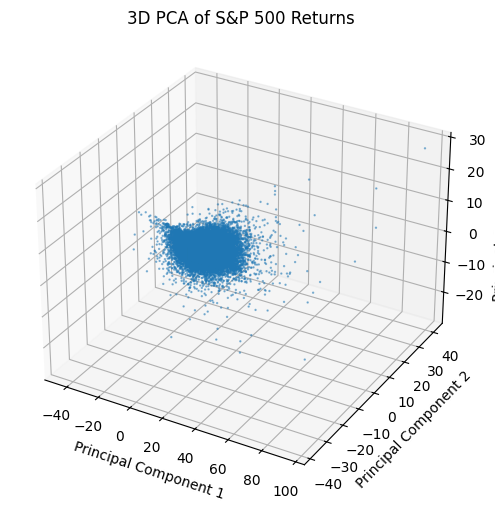

In [27]:
# 3D Scatter plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, s=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of S&P 500 Returns')

plt.show()

In [28]:
from sklearn.cluster import KMeans

# Initialize K-means algorithm with a predefined number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means to the PCA-reduced data
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels


C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



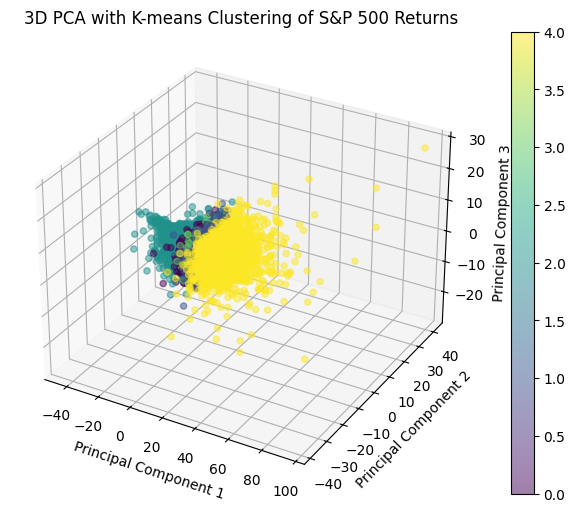

In [30]:
# 3D Scatter plot to visualize clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    pca_df['PC3'], 
    c=pca_df['Cluster'],  # Color coding by cluster labels
    cmap='viridis', 
    alpha=0.5
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA with K-means Clustering of S&P 500 Returns')

plt.colorbar(scatter, ax=ax)
plt.show()

In [32]:
# Analyzing the characteristics of each cluster
cluster_stats = pca_df.groupby('Cluster').mean()

# Displaying cluster characteristics
print(cluster_stats)

            PC1     PC2     PC3  F_1_d_returns
Cluster                                       
0       -1.6664 -0.0468 -0.0046         0.0009
1        1.8409  0.0548  0.0051         0.0003
2       -5.6171  0.1250 -0.0431         0.0045
3        0.0655 -0.0053  0.0054         0.0006
4        6.6001 -0.0651 -0.0857        -0.0007


In [ ]:
# Adding the original target variable for reference
#pca_df['F_1_d_returns'] = total_returns['F_1_d_returns']